## PENGOLAHAN CITRA - F
## ELAN ARYA ADIWIDYA
## 202131157

In [5377]:
import cv2
import matplotlib.pylab as plt
import numpy as np

In [5378]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

In [5379]:
def draw_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0,255, 0), thickness=15)
            
    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

In [5380]:
image = cv2.imread('foto2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [5381]:
print(image.shape)
height = image.shape[0]
width = image.shape[1]

(4160, 2367, 3)


In [5382]:
region_of_interest_vertices = [ 
                               (width/50, height/1.75), 
                               (width/100, height), 
                               (width*4/4, height/1.55) ]


In [5383]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
canny_image = cv2.Canny(gray_image, 100, 200)

In [5384]:
cropped_image = region_of_interest(canny_image, 
                np.array([region_of_interest_vertices], np.int32),)

In [5385]:
lines = cv2.HoughLinesP(cropped_image,
                        rho=6.5,
                        theta=np.pi/90,
                        threshold=115,
                        lines=np.array([]),
                        minLineLength=40,
                        maxLineGap=34)

In [5386]:
image_with_lines = draw_the_lines(image, lines)

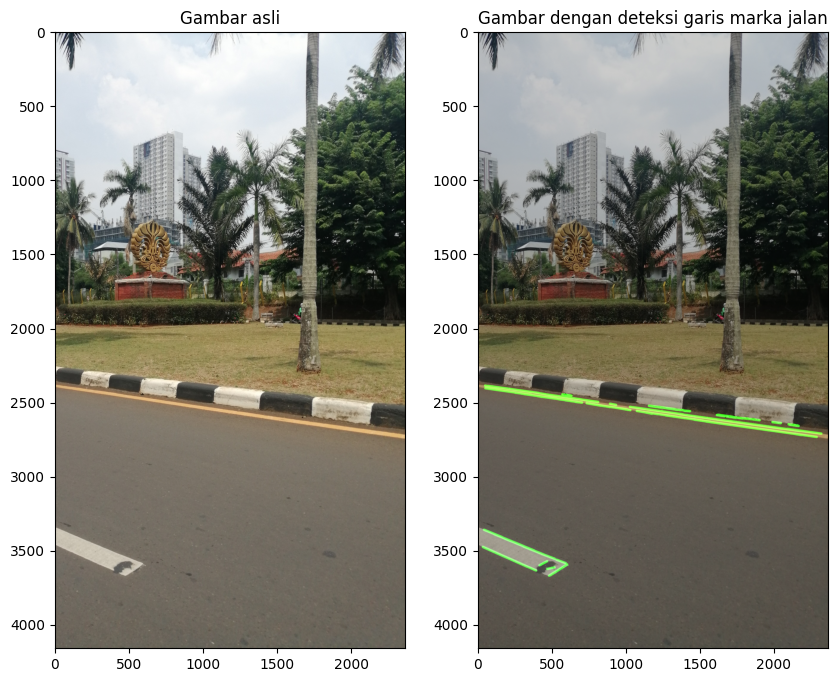

In [5387]:
fig, axs = plt.subplots(1,2, figsize=(10,8))


axs[0].imshow(image)
axs[0].set_title("Gambar asli")

axs[1].imshow(image_with_lines)
axs[1].set_title("Gambar dengan deteksi garis marka jalan")
plt.show()